# Week 9: Clustering of Masaeli et al.

In [1]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

mat = pd.read_csv('WBC.csv')
mat.drop('Unnamed: 0', axis=1, inplace=True)

#### (1) Choose any two variables and plot them against cell identity (in color). Do you see clear separation of these classes? What does this tell you about whether or not you can classify the cells if differing type?

8629 322 1157


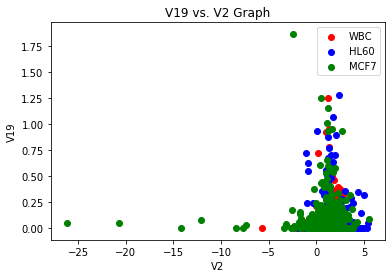

In [2]:
# Answer
V2 = mat['V2']
V19 = mat['V19']
sample = mat['Sample']
countWBC=0
cMC = 0
cHL = 0

for i in range(0, len(V2)):
    if sample[i] == "WBC":
        countWBC = countWBC+1
    elif sample[i] == "MCF7":
        cMC = cMC+1
    elif sample[i] == "HL60":
        cHL = cHL+1

V2wbc, V19wbc = V2[0:8629], V19[0:8629]
plt.scatter(V2wbc, V19wbc, c = 'r', label = "WBC")
V2hl, V19hl = V2[8630:8951], V19[8630:8951]
plt.scatter(V2hl, V19hl, c = 'b', label = "HL60")
V2mc, V19mc = V2[8951:10109], V19[8951:10109] 
plt.scatter(V2mc, V19mc, c= 'g', label = 'MCF7')
    
print(countWBC, cHL, cMC)
plt.xlabel("V2")
plt.ylabel("V19")
plt.title("V19 vs. V2 Graph")
plt.legend()



I can't see clear separation between the three classes. This means we can't just eyeball how the classification work.

#### (2) Use principal components analysis to visualize the variation in each variable. Plot the first two principal components against the cell type. Do you see better separation in this case? What does this tell you about your ability to distinguish the cell types?

Text(0.5, 1.0, 'Scores Plot')

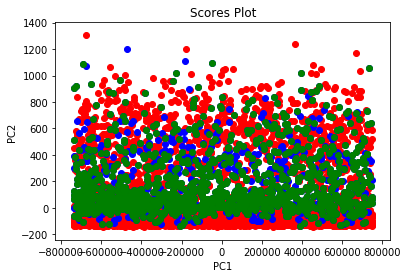

In [15]:
# Answer
from sklearn.decomposition import PCA
from scipy import stats

pca = PCA(n_components=2)

matPCA = mat.drop(columns = ['Sample'])

scores = pca.fit_transform(matPCA)
for i in range(0, countWBC):
    plt.scatter(scores[i,0], scores[i,1], c = 'r', label = 'WBC')
for i in range(countWBC, countWBC+cHL+cMC):
    plt.scatter(scores[i,0], scores[i,1], c = 'b', label = "HL60")
for i in range(countWBC+cHL, countWBC+cHL+cMC):
    plt.scatter(scores[i,0], scores[i,1], c = 'g', label = 'MCF7')

    
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title("Scores Plot")

I do not see better separation in this case. Even with PCA, we are still not capable of distinguishing the different cell types.

#### (3) How does partial least squares fare in desciminating cancer and non-cancer cells (make cancer=1 and non-cancer=0; this is called PLS-DA)? How does this relate to the results in the previous questions?

Score PLSDA: 0.6717032046288665


Text(0.5, 1.0, 'Scores Plot - PLSDA')

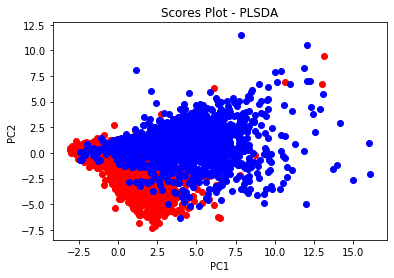

In [16]:
# Answer

binary = np.zeros(len(sample))
for i in range(0, len(sample)):
    if sample[i] == 'WBC':
        binary[i] = 0
    elif sample[i] == 'HL60' or sample[i] == "MCF7":
        binary[i] = 1
        
from sklearn.cross_decomposition import PLSRegression
plsr = PLSRegression(n_components=2)
plsr.fit_transform(matPCA, binary)

score = plsr.score(matPCA, binary)
print("Score PLSDA:",score)

xloading, yloading = plsr.x_loadings_, plsr.y_loadings_
xscore, yscore = plsr.x_scores_, plsr.y_scores_

for i in range(0, countWBC):
    plt.scatter(xscore[i, 0], xscore[i, 1], c='r', label = 'WBC')
for i in range(countWBC, countWBC+cHL+cMC):    
    plt.scatter(xscore[i, 0], xscore[i, 1], c='b', label = 'HL60')

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title("Scores Plot - PLSDA")


PLSDA is performing the different cell-type classification a little better than PCA. At the very least, all the Blues and Reds cluster together.

#### (4) Setup a support vector machine classifier (with linear kernel) to distinguish cancer and non-cancer.

Evaluate how well this performs (hint: think carefully about how you evaluate the model).

In [5]:
# Answer
from sklearn.svm import SVC
from scipy import stats
import sklearn

kanker = ['']*len(binary)
for i in range(0, len(binary)):
    if binary[i] == 0:
        kanker[i] = "noncancer"
    elif binary[i] == 1:
        kanker[i] = "cancer"
        
X = stats.zscore(matPCA)

model = SVC(kernel = 'linear')
model.fit(X, kanker)
SscoreL = model.score(X, kanker)
print("Score with Linear SVM :",SscoreL)

predict = model.predict(X)
cmLinear = sklearn.metrics.confusion_matrix(kanker, predict)
print(cmLinear)

Score with Linear SVM : 0.9709141274238227
[[1268  211]
 [  83 8546]]


With 0.97 as the score, the model classifies 97% of the training data correctly. This is an indicator that SVM with linear kernel is a good approach.

#### (5) Choose and justify your selection of a different kernel to use in SVM classification. (Hint: It should be a kernel with varying complexity, such as polynomial or RBF.)

In [6]:
# Answer
modelRBF = SVC(kernel='rbf')
modelRBF.fit(X, kanker)
print("Score with RBF SVM: ",modelRBF.score(X, kanker))

modelPol = SVC(kernel='poly')
modelPol.fit(X, kanker)
print("Score with Polynomial SVM: ",modelPol.score(X, kanker))

Score with RBF SVM:  0.9818955282944203
Score with Polynomial SVM:  0.9810051444400475


Polynomial and RBF kernel perform better than the linear kernel as the score is greater than the linear kernel. Between the two, it seems that RBF kernel is better because it has a higher score, meaning that the model classifies 98.19% of the training data correctly.

#### (6) Vary the complexity of your kernel and evaluate the ability of it to descriminate data both directly and on crossvalidation.

How does the answer of which classification strategy vary based on whether you are performing cross-validation?

Score with RBF SVM:  0.9818955282944203
For C = 0.1 the score is : 0.9810051444400475
For C = 0.2 the score is : 0.9813019390581718
For C = 0.3 the score is : 0.9814998021369212
For C = 0.4 the score is : 0.980807281361298
For C = 0.5 the score is : 0.9814998021369212
For C = 0.6 the score is : 0.9810051444400475
For C = 0.7 the score is : 0.981994459833795
For C = 0.8 the score is : 0.9814008705975465
For C = 0.9 the score is : 0.980807281361298
For C = 1 the score is : 0.9816976652156707
Score with CV = 0.981994459833795 with C = 0.7


Text(0, 0.5, 'Score')

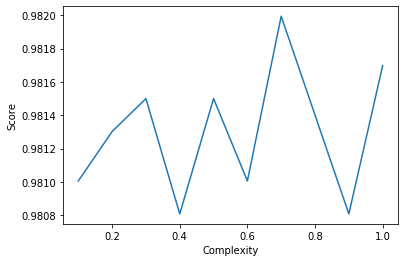

In [11]:
# Answer
from sklearn.model_selection import StratifiedKFold

modelDir = SVC(kernel='rbf')
modelDir.fit(X, kanker)
print("Score with RBF SVM: ",modelDir.score(X, kanker))

kf = StratifiedKFold(n_splits = 10, shuffle = True)
# complexity = np.linspace(0,5,len(X))
complexity = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
binary = binary.flatten()
skor = np.zeros(len(complexity))
bestSkor=0
bestComplexity = 0

for i in range(len(complexity)):
    for train_index, test_index in kf.split(X, binary):
        trainY = binary[train_index]
        testY = binary[test_index]
        trainX = X[train_index]
        testX = X[test_index]
        
        modelPol = SVC(kernel='rbf', degree = complexity[i])
        modelPol.fit(trainX, trainY)
        
    skor[i] = modelPol.score(X,binary)
        
    print("For C =",complexity[i], "the score is :", skor[i])
    if skor[i] > bestSkor:
        bestComplexity = complexity[i]
        bestSkor = skor[i]

print("Score with CV =", bestSkor, 'with C =', bestComplexity)
plt.plot(complexity, skor)
plt.xlabel('Complexity')
plt.ylabel('Score')

The score from cross-validation and direct are different. The highest score we can achieve from the cross validation are generally lower than the direct discrimination.

#### (7) Your experimental collaborator asks you to determine whether she can collect a fewer number of measurements (cells) and still obtain the same classification efficiency when building a new estimator. How might you determine this? Can she?

We'll code it out and see if this works. So collecting a few number of measurements means your model will be working with fewer data. To do so, let's resample our data randomly so that only 7000 data are left for us to work with.

In [12]:
# Answer
from sklearn.utils import resample

resampled = resample(mat, n_samples = 7000)
resampledX = mat.drop(columns = ['Sample'])

model = SVC(kernel = 'rbf', C = bestComplexity)
model.fit(resampledX, binary)
predict = model.predict(resampledX)

kfindices = np.arange(len(binary))
predhold = np.zeros(len(binary))
kf = StratifiedKFold(n_splits=10, shuffle= True)

for train_index, test_index in kf.split(kfindices, binary):
    trainY = binary[train_index]
    testY = binary[test_index]
    trainX = X[train_index]
    testX = X[test_index]
    
    model.fit(trainX, trainY)
    predhold[test_index] = model.predict(testX)
    
    resampleScore = model.score(trainX, trainY)

print("Score after resample :", resampleScore)

modelWithoutRes = SVC(kernel='rbf', C = bestComplexity)
modelWithoutRes.fit(X, kanker)
print("Score without resample :",modelWithoutRes.score(X, kanker))

Score after resample : 0.9808749175642999
Score without resample : 0.9805104867431738


With a fewer number of data, the estimator somehow perform better than with more data. This could happen more likely due to the fact that there are less points that overlap with each other. So it's easier to distinguish under which classification does a point fall.

#### (8) What if you can change the numbers of individual cell types that you collect? Is the model you obtain sensitive to the number of cells in each group to the same extent? Try this with one cell population.

In [14]:
# Answer

Xremoved = X[8500:10109]
#The Xremoved represent the cell almost without WBC (now WBC is only 129 samples)
binaryRemoved = binary[8500:10109]


kfindices = np.arange(len(binaryRemoved))
predholdR = np.zeros(len(binaryRemoved))
kf = StratifiedKFold(n_splits=10, shuffle= True)
model = SVC(kernel = 'rbf', C = bestComplexity)

for train_index, test_index in kf.split(kfindices, binaryRemoved):
    trainY = binaryRemoved[train_index]
    testY = binaryRemoved[test_index]
    trainX = Xremoved[train_index]
    testX = Xremoved[test_index]
    
    model.fit(trainX, trainY)
    predholdR[test_index] = model.predict(testX)
    
    removedScore = model.score(trainX, trainY)

print("Score after removal :", removedScore)
print("Score without removal: ", modelWithoutRes.score(X, kanker))


Score after removal : 0.9910220994475138
Score without removal:  0.9805104867431738


After we remove the majority of WBC cell type, we can see that our score is higher. The reasoning behind this behavior might be due to the fact that 1) we have less data points to deal with and 2) the model will predict better when only 2 cells are in the majority of the given data points. A drawback with doing this is that if we are to introduce a new data and we know that it is WBC, it would be harder for the model to predict that it is indeed classified under WBC.

#### (9) Your collaborator collects completely new data and brings it to you for classification. You take your chosen optimal model from (7) and classify each cell. Would you expect your model to perform better, identically, or worse than before? Why?

My model would perform better than before, as the accuracy from cross-validation is only based on the testing data that's randomly separated from the model; meaning that with CV, the model might underestimate its accuracy. With a new set of data, considering the newly-given data is fairly collected, the model will perform better.

#### (10) As a prior distribution, assume that, among patients coming in for testing, 99% are cancer-free in the end. Estimate how well your assay needs to perform to confidently identify cancer patients.

Your assay does not need to be very confident to identify cancer patients. If we just classify everyone to be cancer-free, you would already have 99% accuracy (which is totally wrong, as you can't just assume that everyone is free of cancer)

Text(0.5, 1.0, 'Sensitivity vs False Positive Rate')

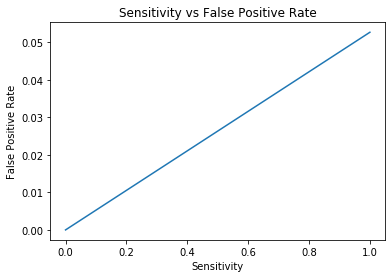

In [30]:
sensitivity = np.linspace(0,1,50)
falsePositiveRate = np.zeros(len(sensitivity))
for i in range(len(sensitivity)):
    falsePositiveRate[i] = (1/19)*sensitivity[i]
    
plt.plot(sensitivity, falsePositiveRate)
plt.xlabel('Sensitivity')
plt.ylabel('False Positive Rate')
plt.title("Sensitivity vs False Positive Rate")